In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The Task

the goal of this project is to analyze nypd arrest data

▪ pick any zip code/neighborhood/district in this dataset as an initial comparison point

▪ pick a feature/measure/column

▪ compare above entity to any other (different) entity - you only need to do one additional comparison point (but you’re welcome to do more comparisons if you feel compelled to do so)

▪ the analysis should include some descriptive statistics

▪ the analysis should include one cleaning task (or more)

▪ the analysis should include one visualization (or more)

In [2]:
from google.colab import files


uploaded = files.upload()

Saving NYPD_Arrest_Data__Year_to_Date__20231220.csv to NYPD_Arrest_Data__Year_to_Date__20231220.csv


In [4]:
#To import and understand the dataset
df = pd.read_csv('NYPD_Arrest_Data__Year_to_Date__20231220.csv')
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,1/1/23,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,2/3/23,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,2/15/23,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,1/4/23,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,2/13/23,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175)


In [5]:
#To understand the dataset
df.tail()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
170090,270955727,7/7/23,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601002,F,B,52,0,25-44,M,BLACK,1017273,255924,40.869067,-73.880600,POINT (-73.8806 40.869067)
170091,273117887,8/18/23,681,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,B,47,0,25-44,F,BLACK,1026480,262584,40.887314,-73.847272,POINT (-73.8472717577564 40.8873136344706)
170092,274301006,9/13/23,969,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,S,122,0,25-44,M,WHITE HISPANIC,951857,161569,40.610087,-74.116666,POINT (-74.11666648991874 40.6100867091453)
170093,269912233,6/15/23,490,"STOLEN PROPERTY 3,POSSESSION",232.0,POSSESSION OF STOLEN PROPERTY,PL 1654000,M,K,62,0,25-44,M,BLACK,983469,157947,40.600204,-74.002812,POINT (-74.00281242 40.60020423)
170094,272045762,7/28/23,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,K,84,0,18-24,M,BLACK,988491,195163,40.702353,-73.984705,POINT (-73.98470449707197 40.70235306254946)


In [8]:
#To understand the dataset. It shows 19 columns and 170095 rows.
df.shape

(170095, 19)

In [6]:
#To get more infos from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170095 entries, 0 to 170094
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                170095 non-null  int64  
 1   ARREST_DATE               170095 non-null  object 
 2   PD_CD                     170095 non-null  int64  
 3   PD_DESC                   170095 non-null  object 
 4   KY_CD                     170082 non-null  float64
 5   OFNS_DESC                 170095 non-null  object 
 6   LAW_CODE                  170095 non-null  object 
 7   LAW_CAT_CD                168838 non-null  object 
 8   ARREST_BORO               170095 non-null  object 
 9   ARREST_PRECINCT           170095 non-null  int64  
 10  JURISDICTION_CODE         170095 non-null  int64  
 11  AGE_GROUP                 170095 non-null  object 
 12  PERP_SEX                  170095 non-null  object 
 13  PERP_RACE                 170095 non-null  o

In [9]:
#To get a statistical summary of the dataset. Results are only provided for numerical data type.
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.700950e+05,170095.000000,170082.000000,170095.000000,170095.000000,1.700950e+05,170095.000000,170095.000000,170095.000000
mean,2.683705e+08,425.242200,249.766342,63.423569,0.945918,1.005863e+06,208326.176925,40.738196,-73.921525
std,4.027782e+06,275.312255,148.500439,34.596068,7.683909,2.152952e+04,29737.941320,0.128134,0.195134
min,2.611809e+08,2.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.253187
25%,2.649555e+08,114.000000,113.000000,40.000000,0.000000,9.913600e+05,186065.000000,40.677251,-73.974365
50%,2.685036e+08,397.000000,236.000000,62.000000,0.000000,1.005511e+06,206851.000000,40.734434,-73.923234
75%,2.718261e+08,705.000000,344.000000,101.000000,0.000000,1.017933e+06,236175.000000,40.814867,-73.878333
max,2.752350e+08,997.000000,995.000000,123.000000,97.000000,1.067185e+06,271819.000000,40.912714,0.000000


In [11]:
#After a first exploration of the entire dataset, we have choosen to concentrate our analysis on the subset below.
df2 = df[['ARREST_KEY','ARREST_DATE','LAW_CAT_CD','ARREST_BORO','AGE_GROUP','PERP_SEX','PERP_RACE']]
df2.head()

,ARREST_KEY,ARREST_DATE,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE
0,261209118,1/1/23,F,K,45-64,F,BLACK
1,262984267,2/3/23,F,K,25-44,M,BLACK
2,263664549,2/15/23,F,K,25-44,M,WHITE
3,261345231,1/4/23,F,M,25-44,M,BLACK
4,263536618,2/13/23,F,K,25-44,M,BLACK


In [14]:
#To drop any duplicate in the subset df2. No presence of duplicates detected.
df2.drop_duplicates()

,ARREST_KEY,ARREST_DATE,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE
0,261209118,1/1/23,F,K,45-64,F,BLACK
1,262984267,2/3/23,F,K,25-44,M,BLACK
2,263664549,2/15/23,F,K,25-44,M,WHITE
3,261345231,1/4/23,F,M,25-44,M,BLACK
4,263536618,2/13/23,F,K,25-44,M,BLACK
...,...,...,...,...,...,...,...
170090,270955727,7/7/23,F,B,25-44,M,BLACK
170091,273117887,8/18/23,M,B,25-44,F,BLACK
170092,274301006,9/13/23,M,S,25-44,M,WHITE HISPANIC
170093,269912233,6/15/23,M,K,25-44,M,BLACK


In [19]:
df2.shape

(170095, 7)

In [16]:
#To verify if the 'ARREST_KEY'is unique
df2['ARREST_KEY'].is_unique

True

In [13]:
# To verify if there are missing values in the dataset. The result shows there are 1257 missing value in the column 'LAW_CAT_CD'. A cleaning is necessary.
df2.isnull().sum()

ARREST_KEY        0
ARREST_DATE       0
LAW_CAT_CD     1257
ARREST_BORO       0
AGE_GROUP         0
PERP_SEX          0
PERP_RACE         0
dtype: int64

In [17]:
#To drop the missing values and verify that the operation is successful.
df3 = df2.dropna()
df3.isnull().sum()

ARREST_KEY     0
ARREST_DATE    0
LAW_CAT_CD     0
ARREST_BORO    0
AGE_GROUP      0
PERP_SEX       0
PERP_RACE      0
dtype: int64

In [18]:
#The result of running this code shows that the dataset is now reduced to 168838 rows
df3.shape

(168838, 7)

In our analysis we are going to compare arrests per category, borough, age group, sex and race perpetrator. We will also make a particular focus on 'Felony' that is any crime punishable by fines and more than one year of incarceration. One or two visualizations will be provided for each level of analysis.

In [30]:
#To calculate, applying the groupby function, the number of arrests by category
df3.groupby(['LAW_CAT_CD'])['ARREST_KEY'].count().sort_values(ascending=False)

LAW_CAT_CD
M    93347
F    73866
V      973
9      459
I      193
Name: ARREST_KEY, dtype: int64

Text(0.5, 1.0, 'Comparison of arrests by category')

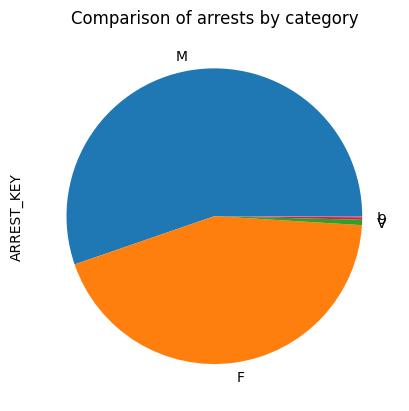

In [31]:
#To visualize the result of the above operation
df3.groupby(['LAW_CAT_CD'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='pie')
plt.title('Comparison of arrests by category')

Text(0.5, 1.0, 'Comparison of arrests by category')

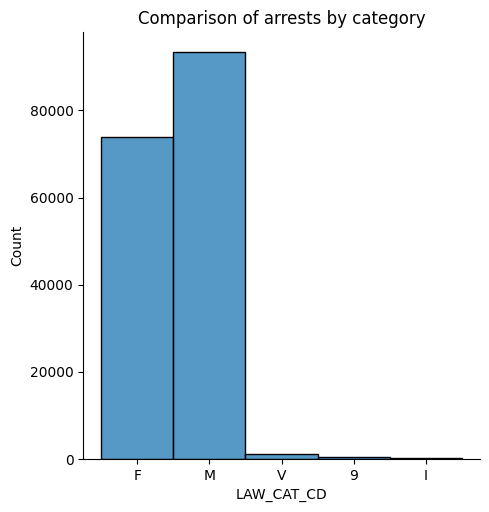

In [32]:
#Another visualization of the arrests by category
sns.displot(df3['LAW_CAT_CD'])
plt.title('Comparison of arrests by category')

In [33]:
#To calculate, applying the groupby function, the number of arrests by age group
df3.groupby(['AGE_GROUP'])['ARREST_KEY'].count().sort_values(ascending=False)

AGE_GROUP
25-44    96835
45-64    33156
18-24    29825
<18       6244
65+       2778
Name: ARREST_KEY, dtype: int64

Text(0.5, 1.0, 'Comparison of arrests by age group')

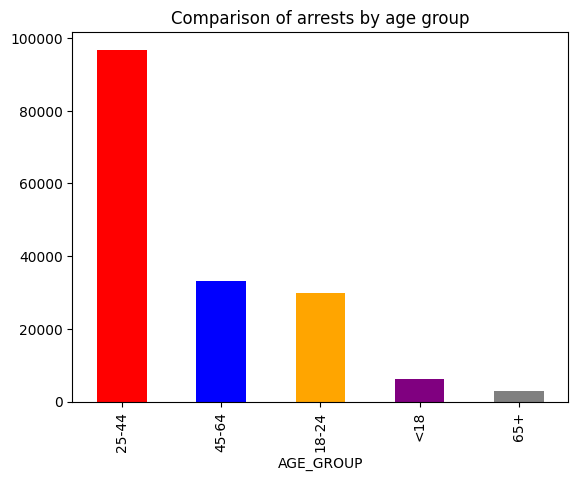

In [34]:
#To visualize the result of the above operation
color=['red','blue','orange','purple','gray']

df3.groupby(['AGE_GROUP'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='bar',color=color)
plt.title('Comparison of arrests by age group')

Text(0.5, 1.0, 'Comparison of arrests by age group')

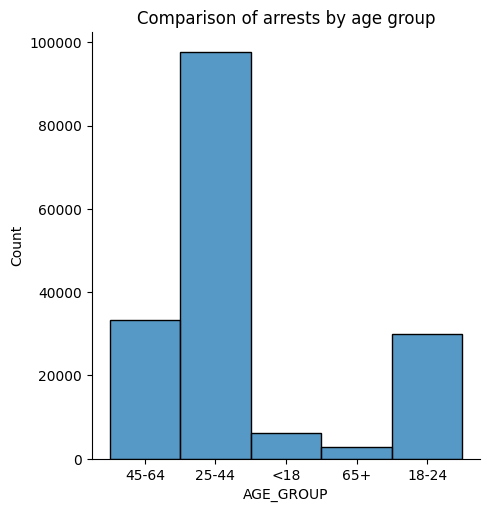

In [25]:
#Another visualization of the arrests by age group
sns.displot(df2['AGE_GROUP'])
plt.title('Comparison of arrests by age group')


In [26]:
#To calculate, applying the groupby function, the number of arrests by borough
df2.groupby(['ARREST_BORO'])['ARREST_KEY'].count().sort_values(ascending=False)

ARREST_BORO
K    46825
B    39957
M    39652
Q    36246
S     7415
Name: ARREST_KEY, dtype: int64

Text(0.5, 1.0, 'Comparison of arrests by borough')

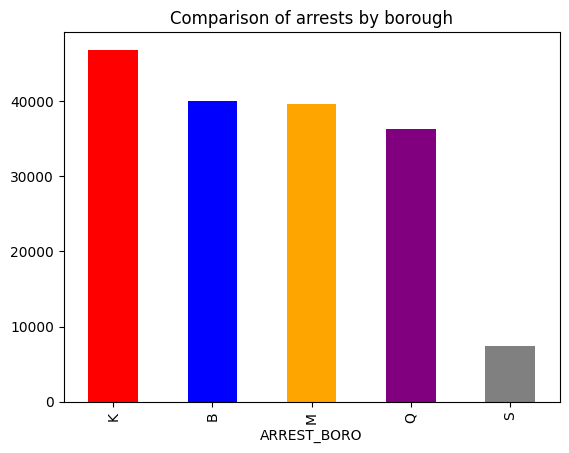

In [29]:
#To visualize the result of the above operation
color=['red','blue','orange','purple','gray']

df2.groupby(['ARREST_BORO'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='bar',color=color)
plt.title('Comparison of arrests by borough')

Text(0.5, 1.0, 'Comparison of arrests by category and borough')

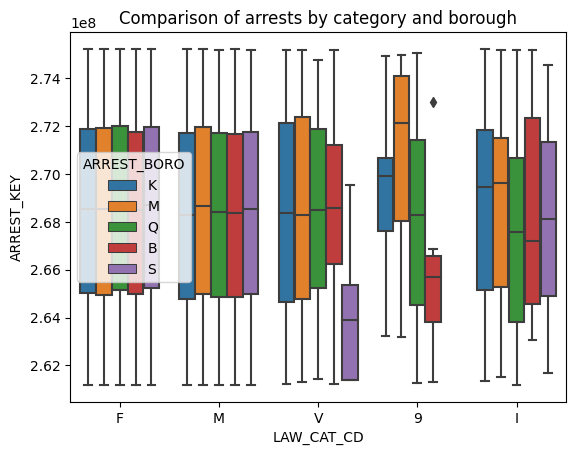

In [36]:
#A visualization of the arrests bycategory and borough
sns.boxplot(x='LAW_CAT_CD',y='ARREST_KEY',data=df3,hue='ARREST_BORO')
plt.title('Comparison of arrests by category and borough')

In [37]:
#To calculate, applying the groupby function, the number of arrests by perpetrator sex
df3.groupby(['PERP_SEX'])['ARREST_KEY'].count().sort_values(ascending=False)

PERP_SEX
M    136439
F     28909
U      3490
Name: ARREST_KEY, dtype: int64

Text(0.5, 1.0, 'Comparison of arrests by perpetrator sex')

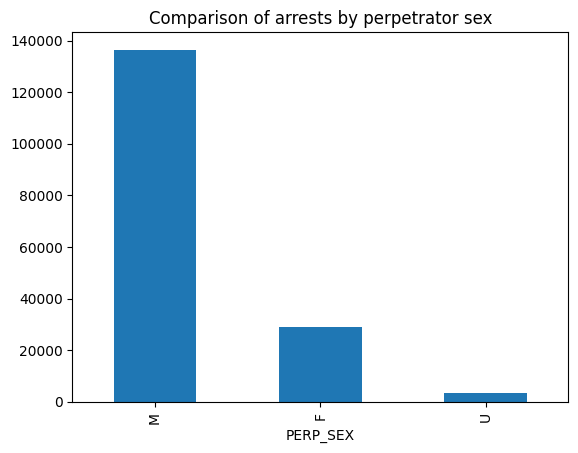

In [39]:
#To visualize the result of the above operation
df3.groupby(['PERP_SEX'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Comparison of arrests by perpetrator sex')

Text(0.5, 1.0, 'Comparison of arrests by perpetrator sex')

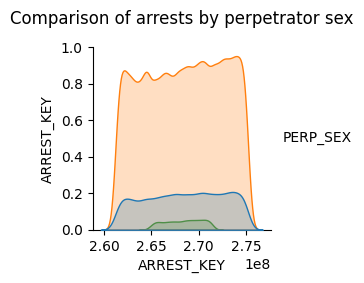

In [41]:
#Another visualization of the arrests peerpetrator sex
sns.pairplot(df3,hue='PERP_SEX')
plt.title('Comparison of arrests by perpetrator sex')

In [42]:
#To calculate, applying the groupby function, the number of arrests by perpetrator race
df3.groupby(['PERP_RACE'])['ARREST_KEY'].count().sort_values(ascending=False)

PERP_RACE
BLACK                             81626
WHITE HISPANIC                    42707
BLACK HISPANIC                    16303
WHITE                             16230
ASIAN / PACIFIC ISLANDER           8982
UNKNOWN                            2440
AMERICAN INDIAN/ALASKAN NATIVE      550
Name: ARREST_KEY, dtype: int64

Text(0.5, 1.0, 'Comparison of arrests by perpetrator race')

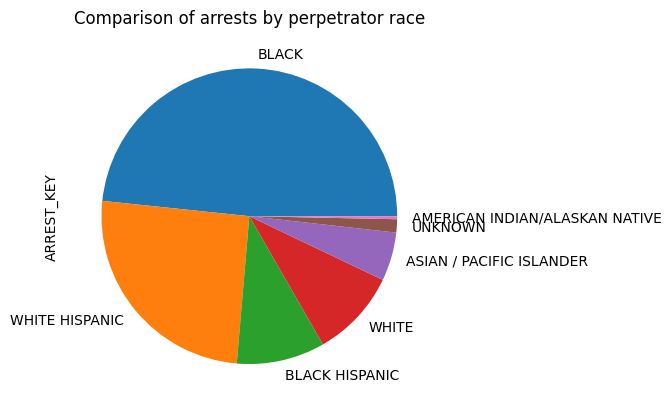

In [45]:
#To visualize the result of the above operation
df3.groupby(['PERP_RACE'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='pie')
plt.title('Comparison of arrests by perpetrator race')

Text(0.5, 1.0, 'Comparison of arrests by perpetrator race')

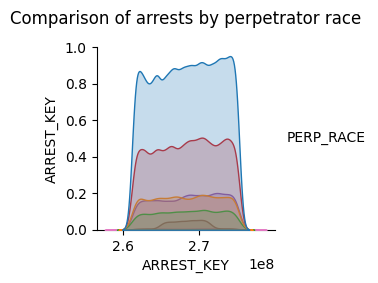

In [46]:
#Another visualization of the arrests peerpetrator race
sns.pairplot(df3,hue='PERP_RACE')
plt.title('Comparison of arrests by perpetrator race')

In [47]:
#To create a subset containing only 'F'(Felony) in the 'LAW_CAT_CD' column
df4 = df3[df3['LAW_CAT_CD']=='F']
df3.head()

,ARREST_KEY,ARREST_DATE,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE
0,261209118,1/1/23,F,K,45-64,F,BLACK
1,262984267,2/3/23,F,K,25-44,M,BLACK
2,263664549,2/15/23,F,K,25-44,M,WHITE
3,261345231,1/4/23,F,M,25-44,M,BLACK
4,263536618,2/13/23,F,K,25-44,M,BLACK


In [50]:
#To get the number of rows in the subset df4
df4.shape

(73866, 7)

In [53]:
#To calculate, applying the groupby function, the number of arrests for felony by borouh
df4.groupby(['ARREST_BORO'])['ARREST_KEY'].count().sort_values(ascending=False)

ARREST_BORO
K    21809
M    16493
B    16335
Q    16010
S     3219
Name: ARREST_KEY, dtype: int64

Text(0.5, 1.0, 'Comparison of arrests for felony by borough')

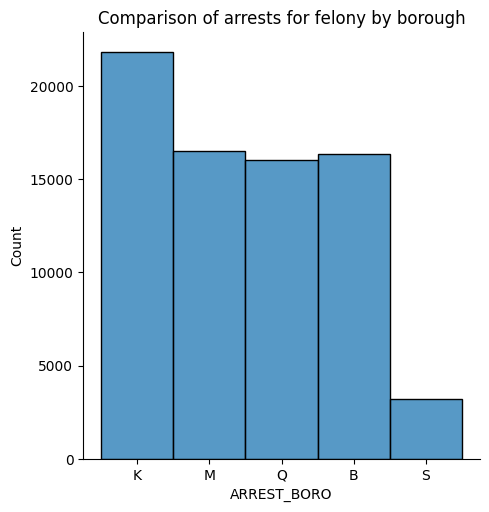

In [66]:
#To visualize the result of the above operation
sns.displot(df4['ARREST_BORO'])
plt.title('Comparison of arrests for felony by borough')

In [54]:
#To calculate, applying the groupby function, the number of arrests for felony by borouh and age group
df4.groupby(['ARREST_BORO','AGE_GROUP'])['ARREST_KEY'].count().sort_values(ascending=False)

ARREST_BORO  AGE_GROUP
K            25-44        12172
Q            25-44         9198
M            25-44         8922
B            25-44         8907
K            18-24         4126
             45-64         3915
M            45-64         3513
B            18-24         3444
Q            18-24         3065
M            18-24         2870
Q            45-64         2596
B            45-64         2569
S            25-44         1752
K            <18           1286
B            <18           1232
M            <18            902
Q            <18            876
S            45-64          628
             18-24          564
K            65+            310
M            65+            286
Q            65+            275
S            <18            238
B            65+            183
S            65+             37
Name: ARREST_KEY, dtype: int64

Text(0.5, 1.0, 'Comparison of arrests for felony by borough and age group')

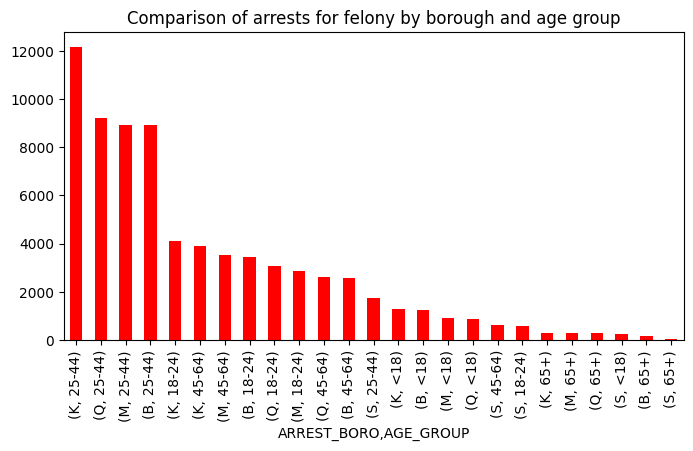

In [67]:
#To visualize the result of the above operation
color=['red']

df4.groupby(['ARREST_BORO','AGE_GROUP'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='bar',figsize=(8,4),color=color)
plt.title('Comparison of arrests for felony by borough and age group')

In [55]:
#To calculate, applying the groupby function, the number of arrests for felony by race and age group
df4.groupby(['PERP_RACE','AGE_GROUP'])['ARREST_KEY'].count().sort_values(ascending=False)


PERP_RACE                       AGE_GROUP
BLACK                           25-44        20418
WHITE HISPANIC                  25-44        10098
BLACK                           18-24         7450
                                45-64         6688
BLACK HISPANIC                  25-44         3982
WHITE                           25-44         3628
WHITE HISPANIC                  18-24         3592
                                45-64         2913
BLACK                           <18           2735
ASIAN / PACIFIC ISLANDER        25-44         2170
WHITE                           45-64         1718
BLACK HISPANIC                  18-24         1560
WHITE HISPANIC                  <18            949
BLACK HISPANIC                  45-64          898
ASIAN / PACIFIC ISLANDER        45-64          782
                                18-24          613
WHITE                           18-24          610
UNKNOWN                         25-44          538
BLACK HISPANIC                  <18     

Text(0.5, 1.0, 'Comparison of arrests for felony by race and age group')

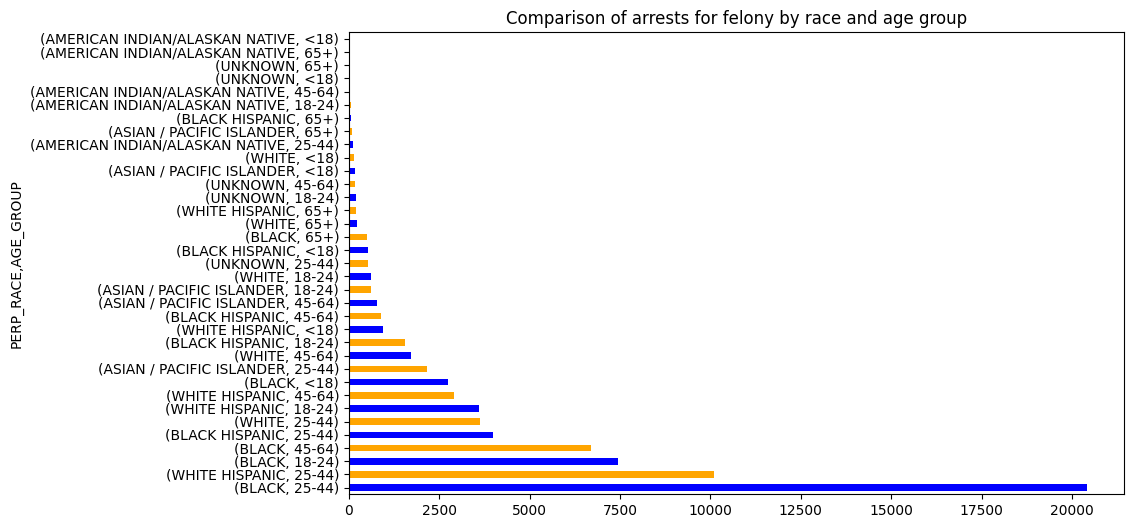

In [68]:
#To visualize the result of the above operation
color=['blue','orange']

df4.groupby(['PERP_RACE','AGE_GROUP'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='barh',figsize=(10,6),color=color)
plt.title('Comparison of arrests for felony by race and age group')

In [65]:

#To calculate, applying the groupby function, the number of arrests for felony by perpetrator sex
df4.groupby(['PERP_SEX'])['ARREST_KEY'].count().sort_values(ascending=False)

PERP_SEX
M    61278
F    11361
U     1227
Name: ARREST_KEY, dtype: int64

Text(0.5, 1.0, 'Comparison of arrests for felony by perpetrator sex')

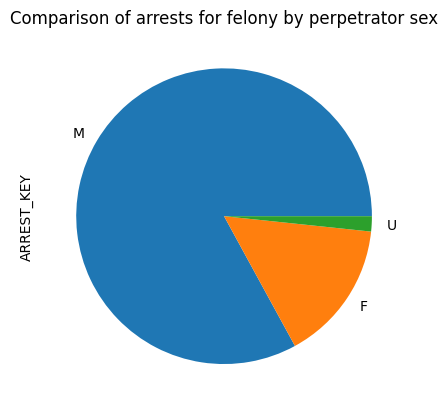

In [69]:
#To visualize the result of the above operation
df4.groupby(['PERP_SEX'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='pie')
plt.title('Comparison of arrests for felony by perpetrator sex')

**Conclusion**

The data analysis allows us to produce the following conclusions:
1- When we take into account all arrest cases:
a) It is the category 'Misdemeanor' (M) which. comes at the top of the causes of arrest with 93,347 cases or 55.28%. It is followed by the 'Felony' (F) category with 73,866 cases or 43.74%.
b) In relation to age, it is the 25-44 age group which dominates the ranking with 96,835 cases or 57.35%. In second position, we find 45-64 year olds with 33,156 cases or 19.63%. THE. 65+ closes the ranking with 2778 or 1.64%.
c) Compared to the borough, Brooklyn records the most arrests with 46,825 cases or 27.73%. Bronx and Manhattan follow almost equally with 39,957 cases (23.66%) and 39,652 cases (23.48%) respectively. Staten Island ranks last with 7,415 cases or 4.39%.
d) Compared to race, arrests are more frequent among black people with 81,626 cases or 48.34% while they only represent 23.1% of the population of New York; Hispanics, black and white combined, total 59,010 cases (34.95%) but represent 29% of the population. As for non-Hispanic whites, with 16,230 arrests, they contribute 9.61% of cases while they represent 31.2% of the population.
2- When we concentrate the analysis on only cases of arrest for felony, we obtain the following data:
a) Brooklyn is still at the top of the ranking with 29.52% of cases (21809) while Staten Island is in last place with 4.35% of arrests (3219).
b) 25-44 year olds, all races combined, provide the most arrest cases regardless of the borough considered.
c) Blacks aged 25-44 and white Hispanics aged 25-44 occupy the first two places in the ranking when we group felony arrests by age and race.
d) Finally, we note that men with 61,276 cases of arrest (82.95%) clearly exceed women who have 11,361 cases (15.38).
